c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


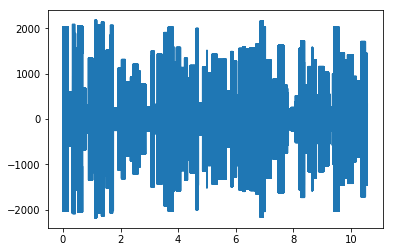

In [4]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

RATE = 44100
DTYPE = np.int16

#生成正弦波
def generate(freq, amp, duration, phi):
    t = np.linspace(0, duration, duration * RATE)
    data = np.sin(2 * np.pi * freq * t + phi) * amp
    
    return data.astype(DTYPE)

# 初始化
# 弹奏89个音符
NTONES = 89
# 振幅是 200 - 2000
amps = 2000. * np.random.random((NTONES,)) + 200.
# 时长是 0.01 - 0.2
durations = 0.19 * np.random.random((NTONES,)) + 0.01
# 键从88个中任取
keys = np.random.randint(1, 88, NTONES)
# 频率使用上面的公式生成
freqs = 440.0 * 2 ** ((keys - 49.)/12.)
# 初相是0 - 2 * pi
phi = 2 * np.pi * np.random.random((NTONES,))

tone = np.array([], dtype = DTYPE)

for i in range(NTONES):
    # 对于每个音符生成正弦波
    newtone = generate(freqs[i], amp = amps[i], duration = durations[i], phi = phi[i])
    # 附加到音频后面
    tone = np.concatenate((tone, newtone))
    
# 保存文件
scipy.io.wavfile.write('generated_tone.wav', RATE, tone)

# 绘制音频数据
plt.plot(np.linspace(0, len(tone)/RATE, len(tone)), tone)
plt.show()